In [ ]:
import random
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mypackage.common import dish_cafe1_file, dish_cafe2_file, dish_metadata_basedir, splits_dir, depth_train_file, \
    dish_id_col, depth_test_file, rgb_test_file, rgb_train_file, dish_images_path
from mypackage.utility import load_dish_metadata, check_dir
from mypackage.utility import get_rgb_imagepath

In [3]:
cafe_1,cafe1_ing = load_dish_metadata(dish_metadata_basedir + dish_cafe1_file)
cafe_2,cafe2_ing = load_dish_metadata(dish_metadata_basedir + dish_cafe2_file)

In [4]:
# Display Information on the loaded files
print("Cafe = 1","*" * 50)
print(cafe_1.info())
print(cafe_1.shape)
print("Cafe = 1 Dish Ingredients","*" * 50)
print(cafe1_ing.info())
print(cafe1_ing.shape)

print("Cafe = 2","*" * 50)
print(cafe_2.info())
print("Shape = ",cafe_2.shape)
print("Cafe = 2 Dish Ingredients","*" * 50)
print(cafe2_ing.info())
print("Shape = ",cafe2_ing.shape)

Cafe = 1 **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dish_id         4768 non-null   object
 1   total_calories  4768 non-null   object
 2   total_mass      4768 non-null   object
 3   total_fat       4768 non-null   object
 4   total_carb      4768 non-null   object
 5   total_protein   4768 non-null   object
dtypes: object(6)
memory usage: 223.6+ KB
None
(4768, 6)
Cafe = 1 Dish Ingredients **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27225 entries, 0 to 27224
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dish_id   27225 non-null  object
 1   id        27225 non-null  object
 2   name      27225 non-null  object
 3   grams     27225 non-null  object
 4   calorie

In [5]:
dish = pd.concat([cafe_1,cafe_2])
dish_ingredients = pd.concat([cafe1_ing,cafe2_ing])
print("Total Dishes",dish.shape)
print("Total Dish Ingredients",dish_ingredients.shape)

Total Dishes (5006, 6)
Total Dish Ingredients (28455, 8)


In [6]:
depth_train = pd.read_csv(splits_dir + depth_train_file,header=None,names=dish_id_col)
depth_test = pd.read_csv(splits_dir + depth_test_file,header=None,names=dish_id_col)
rgb_test = pd.read_csv(splits_dir + rgb_test_file,header=None,names=dish_id_col)
rgb_train = pd.read_csv(splits_dir + rgb_train_file,header=None,names=dish_id_col)

In [7]:
print("Depth train split ids shape = ",depth_train.shape)
print(depth_train.head())
print("RGB train split ids shape = ",rgb_train.shape)
print(rgb_train.head())
print("Depth test split ids shape = ",depth_test.shape)
print(depth_test.head())
print("RGB test split ids shape = ",rgb_test.shape)
print(rgb_test.head())

Depth train split ids shape =  (2758, 1)
           dish_id
0  dish_1558641037
1  dish_1562958721
2  dish_1565799617
3  dish_1561491210
4  dish_1561661806
RGB train split ids shape =  (4059, 1)
           dish_id
0  dish_1550862840
1  dish_1558641037
2  dish_1562958721
3  dish_1565799617
4  dish_1561491210
Depth test split ids shape =  (507, 1)
           dish_id
0  dish_1565035746
1  dish_1558639818
2  dish_1558549605
3  dish_1561663580
4  dish_1565898402
RGB test split ids shape =  (709, 1)
           dish_id
0  dish_1551235699
1  dish_1551564176
2  dish_1550873338
3  dish_1565035746
4  dish_1550859694


In [8]:

train_dish_ids = pd.merge(depth_train,rgb_train)
test_dish_ids = pd.merge(depth_test,rgb_test)
print("Train Dish Ids = ",train_dish_ids.shape)
print("Test Dish Ids = ",test_dish_ids.shape)

Train Dish Ids =  (2758, 1)
Test Dish Ids =  (507, 1)


In [9]:
s1 = check_dir(test_dish_ids.dish_id)
s2 = check_dir(train_dish_ids.dish_id)
s3 = check_dir(rgb_train.dish_id)
s4 = check_dir(rgb_test.dish_id)
print("Test Dish Ids = ",test_dish_ids.shape,s1.shape,s1[s1.exists == True].shape)
print("Train Dish Ids = ",train_dish_ids.shape,s2.shape,s2[s2.exists == True].shape)
print("RGB Train Ids = ",rgb_train.shape,s3.shape,s3[s3.exists == True].shape)
print("RGB Test Ids = ",rgb_test.shape,s4.shape,s4[s4.exists == True].shape)
print("RGB Train ",s3.exists.value_counts())
print("RGB Test ",s4.exists.value_counts())

Test Dish Ids =  (507, 1) (507, 2) (507, 2)
Train Dish Ids =  (2758, 1) (2758, 2) (2758, 2)
RGB Train Ids =  (4059, 1) (4059, 2) (2758, 2)
RGB Test Ids =  (709, 1) (709, 2) (507, 2)
RGB Train  True     2758
False    1301
Name: exists, dtype: int64
RGB Test  True     507
False    202
Name: exists, dtype: int64


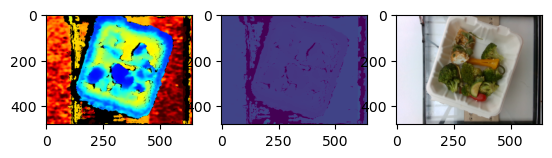

In [10]:
i = random.randrange(0,len(train_dish_ids))
# print(i,train_dish_ids.dish_id[i])
img_path = dish_images_path + train_dish_ids.dish_id[i]
# print(img_path)
f,a = plt.subplots(1,3)

a[0].imshow(plt.imread(img_path + '/depth_color.png'))
a[1].imshow(plt.imread(img_path + '/depth_raw.png'))
a[2].imshow(plt.imread(img_path + '/rgb.png'))

plt.show()

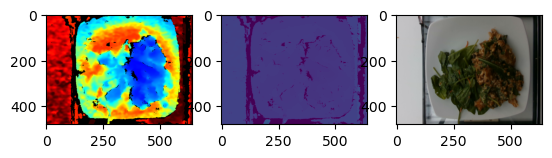

In [11]:
i_test = random.randrange(0,len(test_dish_ids))
# print(i,train_dish_ids.dish_id[i])
img_path = dish_images_path + test_dish_ids.dish_id[i_test]
# print(img_path)
f,a = plt.subplots(1,3)

a[0].imshow(plt.imread(img_path + '/depth_color.png'))
a[1].imshow(plt.imread(img_path + '/depth_raw.png'))
a[2].imshow(plt.imread(img_path + '/rgb.png'))

plt.show()

In [12]:
print("Dish Master",dish.shape)
print("Dish Ingredients Master",dish_ingredients.shape)
print("Training Dish Ids",train_dish_ids.shape)
print("Test Dish Ids",test_dish_ids.shape)

d1 = train_dish_ids.query('dish_id in @dish.dish_id')
print(d1.shape)
d1 = train_dish_ids.query('dish_id in @dish_ingredients.dish_id')
print(d1.shape)
d1 = test_dish_ids.query('dish_id in @dish.dish_id')
print(d1.shape)
d1 = test_dish_ids.query('dish_id in @dish_ingredients.dish_id')
print(d1.shape)

Dish Master (5006, 6)
Dish Ingredients Master (28455, 8)
Training Dish Ids (2758, 1)
Test Dish Ids (507, 1)
(2758, 1)
(2758, 1)
(507, 1)
(507, 1)


In [14]:
print(dish.info())

print(dish_ingredients.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5006 entries, 0 to 237
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dish_id         5006 non-null   object
 1   total_calories  5006 non-null   object
 2   total_mass      5006 non-null   object
 3   total_fat       5006 non-null   object
 4   total_carb      5006 non-null   object
 5   total_protein   5006 non-null   object
dtypes: object(6)
memory usage: 273.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28455 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dish_id   28455 non-null  object
 1   id        28455 non-null  object
 2   name      28455 non-null  object
 3   grams     28455 non-null  object
 4   calories  28455 non-null  object
 5   fat       28455 non-null  object
 6   carb      28455 non-null  object
 7   protein   28455 non-null  object
dtypes: o

In [17]:
dish_ingredients['grams'] = dish_ingredients.grams.astype("float32")
dish_ingredients['calories'] = dish_ingredients.calories.astype("float32")
dish_ingredients['fat'] = dish_ingredients.fat.astype("float32")
dish_ingredients['carb'] = dish_ingredients.carb.astype("float32")
dish_ingredients['protein'] = dish_ingredients.protein.astype("float32")

In [18]:
dish["total_calories"] = dish.total_calories.astype("float32")
dish["total_mass"] = dish.total_mass.astype("float32")
dish["total_fat"] = dish.total_fat.astype("float32")
dish["total_carb"] = dish.total_carb.astype("float32")
dish["total_protein"] = dish.total_protein.astype("float32")

In [19]:
dish.describe()

,total_calories,total_mass,total_fat,total_carb,total_protein
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000
mean,213.332123,189.980225,10.721587,17.002987,14.476484
std,308.762665,269.299500,24.455769,28.680634,18.561609
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,49.939999,73.000000,0.378500,4.338500,1.296000
50%,141.699997,145.000000,5.823762,11.801218,7.047808
75%,314.518776,257.000000,15.447732,23.570614,21.463784
max,9485.815430,7975.000000,875.541016,844.568604,147.491821


In [20]:
dish_ingredients.describe()

,grams,calories,fat,carb,protein
count,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000
mean,34.259148,39.632137,2.005685,3.124736,2.670988
std,130.987320,123.938812,10.045610,12.070679,7.837898
min,0.001059,0.000000,0.000000,0.000000,0.000000
25%,1.217384,0.489875,0.003077,0.017182,0.010084
50%,7.563636,6.255319,0.056978,0.274640,0.143219
75%,50.240406,39.441349,0.721286,2.836151,1.058157
max,7974.000000,9170.099609,853.218018,837.479980,118.265701


In [21]:
dish_ing_by_count = dish_ingredients[['dish_id','name','id']].groupby('dish_id',as_index=False).id.count().sort_values(by="id",ascending=False)
# All Ingredients
print(dish_ingredients.name.unique())

['soy sauce' 'garlic' 'white rice' 'parsley' 'onions' 'brown rice'
 'vinegar' 'apple' 'mixed greens' 'sugar' 'salt' 'lemon juice' 'olive oil'
 'pork' 'bok choy' 'pepper' 'millet' 'roasted potatoes'
 'chicken apple sausage' 'green beans' 'jalapenos' 'wheat berry' 'cabbage'
 'carrot' 'caesar salad' 'mayonnaise' 'cherry tomatoes' 'cucumbers'
 'baby carrots' 'deprecated' 'chilaquiles' 'tomatoes' 'cilantro'
 'mustard greens' 'arugula' 'asparagus' 'lime' 'mangos' 'scrambled eggs'
 'yam' 'grapes' 'egg whites' 'sweet potato' 'eggplant' 'cauliflower'
 'squash' 'chicken breast' 'spinach (raw)' 'parmesan cheese' 'thyme'
 'honeydew melons' 'broccoli' 'berries' 'chicken' 'cantaloupe' 'potatoes'
 'pineapple' 'steak' 'roast chicken' 'bacon' 'chard' 'blueberries'
 'mushroom' 'mustard' 'walnuts' 'shallots' 'salmon' 'ginger' 'brownies'
 'sour cream' 'cheese pizza' 'wine' 'cream' 'beef' 'pasta' 'zucchini'
 'chili' 'almonds' 'radishes' 'rice noodles' 'pizza' 'green onions'
 'celery root' 'hash browns' 'pe

In [22]:
dish_ingredients[dish_ingredients.dish_id == 'dish_1561578461']

,dish_id,id,name,grams,calories,fat,carb,protein
6372,dish_1561578461,ingr_0000000025,beef,40.470886,101.177216,6.070633,0.000000,10.522430
6373,dish_1561578461,ingr_0000000291,salt,0.696817,0.000000,0.000000,0.000000,0.000000
6374,dish_1561578461,ingr_0000000033,bell peppers,1.829787,0.731915,0.003660,0.164681,0.036596
6375,dish_1561578461,ingr_0000000161,olive oil,0.916035,8.097750,0.916035,0.000000,0.000000
6376,dish_1561578461,ingr_0000000031,cucumbers,9.148936,0.914894,0.000000,0.182979,0.091489
6377,dish_1561578461,ingr_0000000030,lettuce,18.297873,2.744681,0.036596,0.530638,0.256170
6378,dish_1561578461,ingr_0000000433,roasted potatoes,69.000000,97.290001,4.692000,12.420000,1.449000
6379,dish_1561578461,ingr_0000000521,basil,0.323114,0.077547,0.000000,0.006462,0.012925
6380,dish_1561578461,ingr_0000000518,thyme,0.201946,0.203965,0.003433,0.048467,0.012117
6381,dish_1561578461,ingr_0000000122,garlic,0.646229,0.962881,0.003231,0.213256,0.041359


In [23]:
## Most common ingredient
df = dish_ingredients.groupby(["name"],as_index=False).count().sort_values(by="id",ascending=False).head(30)

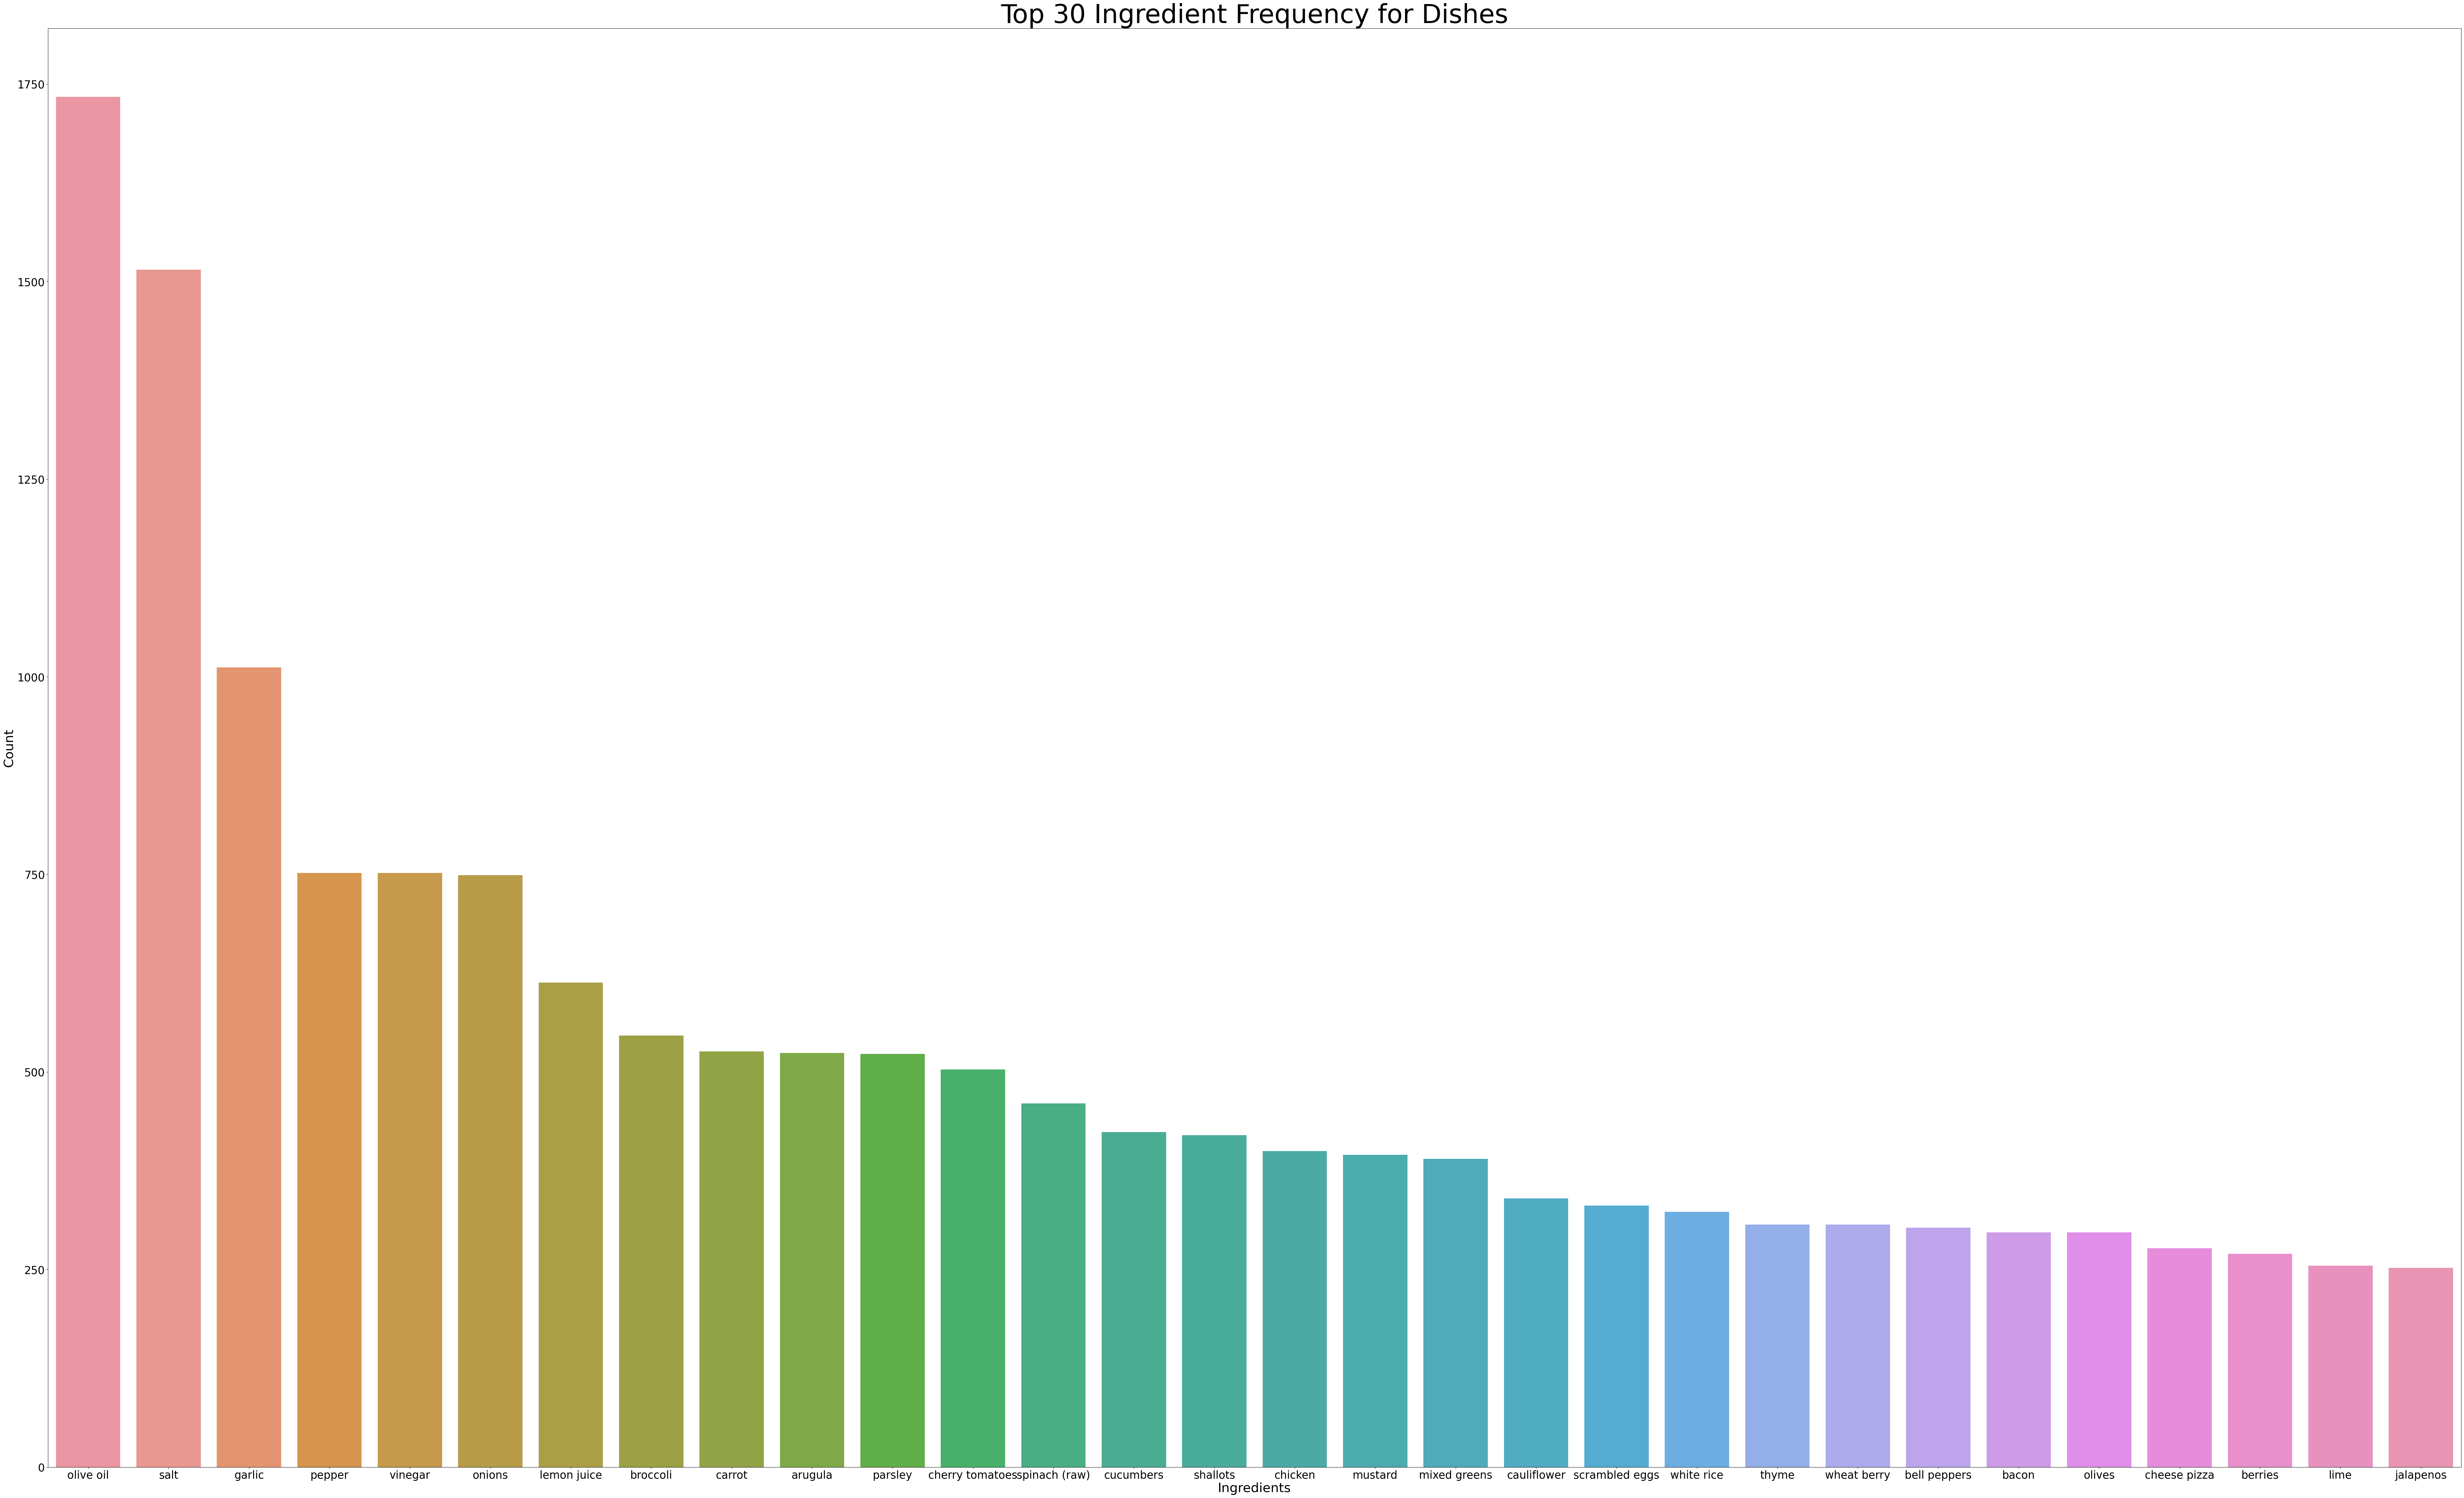

In [26]:
plt.figure(figsize=(100,60))
b = sns.barplot(x=df.name,y=df.dish_id)
b.axes.set_title("Top 30 Ingredient Frequency for Dishes",fontsize=60)
b.set_xlabel("Ingredients",fontsize=30)
b.set_ylabel("Count",fontsize=30)
b.tick_params(labelsize=25)

In [27]:
train_sample_dishes = dish.loc[dish.dish_id.isin(train_dish_ids.dish_id)]
train_sample_dishes_ing = dish_ingredients.loc[dish_ingredients.dish_id.isin(train_dish_ids.dish_id)]
test_sample_dishes = dish.loc[dish.dish_id.isin(test_dish_ids.dish_id)]
test_sample_dishes_ing = dish_ingredients.loc[dish_ingredients.dish_id.isin(test_dish_ids.dish_id)]
print("Train Samples Dish Loaded = ",train_sample_dishes.shape)
print("Train Samples Ingredients Loaded = ",train_sample_dishes_ing.shape)
print("Test Samples Dish Loaded = ",test_sample_dishes.shape)
print("Test Samples Ingredients Loaded = ",test_sample_dishes_ing.shape)

Train Samples Dish Loaded =  (2758, 6)
Train Samples Ingredients Loaded =  (20278, 8)
Test Samples Dish Loaded =  (507, 6)
Test Samples Ingredients Loaded =  (3581, 8)


In [32]:
merged_dish_id  = train_dish_ids.dish_id
merged_dish_id = merged_dish_id.append(test_dish_ids.dish_id)
# pd.concat(train_dish_ids.dish_id,test_dish_ids.dish_id)

C:\Users\kurup\AppData\Local\Temp\ipykernel_40036\436913470.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_dish_id = merged_dish_id.append(test_dish_ids.dish_id)


In [33]:
dish_info =  dish.loc[dish.dish_id.isin(merged_dish_id)]

In [34]:
dish_info

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193.0,12.387489,28.218290,18.633970
2,dish_1561662054,419.438782,292.0,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290.0,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103.0,0.148000,4.625000,0.956000
5,dish_1558372433,74.360001,143.0,0.286000,0.429000,20.020000
...,...,...,...,...,...,...
4760,dish_1563295334,228.540009,96.0,17.380001,1.492000,15.540001
4762,dish_1566329234,262.625214,457.0,10.797179,21.224293,23.129114
4765,dish_1562691737,485.676880,700.0,11.722251,70.597321,27.926394
4766,dish_1558458496,53.130001,77.0,0.154000,13.860001,0.539000


In [37]:
dish_images = get_rgb_imagepath(dish_info.dish_id)

In [38]:
dish_images[0]

{'dish_id': 'dish_1561662216',
 'path': 'E://nutrition5k_dataset/imagery/realsense_overhead/dish_1561662216/rgb.png'}

In [39]:
data = pd.DataFrame(dish_images).merge(dish_info)
data

,dish_id,path,total_calories,total_mass,total_fat,total_carb,total_protein
0,dish_1561662216,E://nutrition5k_dataset/imagery/realsense_over...,300.794281,193.0,12.387489,28.218290,18.633970
1,dish_1561662054,E://nutrition5k_dataset/imagery/realsense_over...,419.438782,292.0,23.838249,26.351543,25.910593
2,dish_1562008979,E://nutrition5k_dataset/imagery/realsense_over...,382.936646,290.0,22.224644,10.173570,35.345387
3,dish_1560455030,E://nutrition5k_dataset/imagery/realsense_over...,20.590000,103.0,0.148000,4.625000,0.956000
4,dish_1558372433,E://nutrition5k_dataset/imagery/realsense_over...,74.360001,143.0,0.286000,0.429000,20.020000
...,...,...,...,...,...,...,...
3260,dish_1563295334,E://nutrition5k_dataset/imagery/realsense_over...,228.540009,96.0,17.380001,1.492000,15.540001
3261,dish_1566329234,E://nutrition5k_dataset/imagery/realsense_over...,262.625214,457.0,10.797179,21.224293,23.129114
3262,dish_1562691737,E://nutrition5k_dataset/imagery/realsense_over...,485.676880,700.0,11.722251,70.597321,27.926394
3263,dish_1558458496,E://nutrition5k_dataset/imagery/realsense_over...,53.130001,77.0,0.154000,13.860001,0.539000


In [40]:
## Lets standardize the y values
maxCal = data.total_calories.max()
data["total_calories_norm"] = data.total_calories/maxCal

In [41]:
data[["dish_id","total_calories","total_calories_norm"]]

,dish_id,total_calories,total_calories_norm
0,dish_1561662216,300.794281,0.076279
1,dish_1561662054,419.438782,0.106367
2,dish_1562008979,382.936646,0.097110
3,dish_1560455030,20.590000,0.005221
4,dish_1558372433,74.360001,0.018857
...,...,...,...
3260,dish_1563295334,228.540009,0.057956
3261,dish_1566329234,262.625214,0.066600
3262,dish_1562691737,485.676880,0.123164
3263,dish_1558458496,53.130001,0.013473


In [42]:
def f(t):
    t['b'] = [5,5,5]

In [43]:
t = pd.DataFrame()

t["a"] = [1,2,3]

In [44]:
print(t)
f(t)
print(t)

   a
0  1
1  2
2  3
   a  b
0  1  5
1  2  5
2  3  5
